<a href="https://colab.research.google.com/github/SIDIBEMoussa/Hackhatons/blob/main/Hakhathon2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [ ]:
train_set=pd.read_csv("Train_v2.csv")
test_set=pd.read_csv("Test_v2.csv")

In [ ]:
train_set.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
df1=train_set[["country","year","uniqueid","household_size","age_of_respondent"]]
t1=test_set[["country","year","uniqueid","household_size","age_of_respondent"]]

In [ ]:
df2=train_set.drop(["country","year","uniqueid","household_size","age_of_respondent"],axis=1)
t2=test_set.drop(["country","year","uniqueid","household_size","age_of_respondent"],axis=1)

In [ ]:
df2.head()

,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Yes,Rural,Yes,Female,Spouse,Married/Living together,Secondary education,Self employed
1,No,Rural,No,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Yes,Urban,Yes,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,No,Urban,No,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
df2["cellphone_access"]=[str(a) for a in df2.cellphone_access]
df2["gender_of_respondent"]=[str(a) for a in df2.gender_of_respondent]
df2["relationship_with_head"]=[str(a) for a in df2.relationship_with_head]
df2["marital_status"]=[str(a) for a in df2.marital_status]
df2["education_level"]=[str(a) for a in df2.education_level]
df2["job_type"]=[str(a) for a in df2.job_type]


t2["cellphone_access"]=[str(a) for a in t2.cellphone_access]
t2["gender_of_respondent"]=[str(a) for a in t2.gender_of_respondent]
t2["relationship_with_head"]=[str(a) for a in t2.relationship_with_head]
t2["marital_status"]=[str(a) for a in t2.marital_status]
t2["education_level"]=[str(a) for a in t2.education_level]
t2["job_type"]=[str(a) for a in t2.job_type]

In [ ]:
df2.head()

,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Yes,Rural,Yes,Female,Spouse,Married/Living together,Secondary education,Self employed
1,No,Rural,No,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Yes,Urban,Yes,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,No,Urban,No,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
lb=LabelEncoder()

In [ ]:
for col in df2.columns:
  df2[col]=lb.fit_transform(df2[col])

In [ ]:
for col in t2.columns:
  t2[col]=lb.fit_transform(t2[col])

In [ ]:
df2.head()

,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,1,0,1,0,5,2,3,8
1,0,0,0,0,1,4,0,4
2,1,2,1,1,3,3,5,8
3,0,0,1,0,1,2,2,3
4,0,2,0,1,0,3,2,5


In [ ]:
t2.head()

,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,1,1,1,1,2,3,2
1,1,1,1,1,2,5,3
2,0,0,0,4,2,0,8
3,0,0,0,1,2,2,8
4,1,0,1,0,3,3,8


In [ ]:
import seaborn as  sns

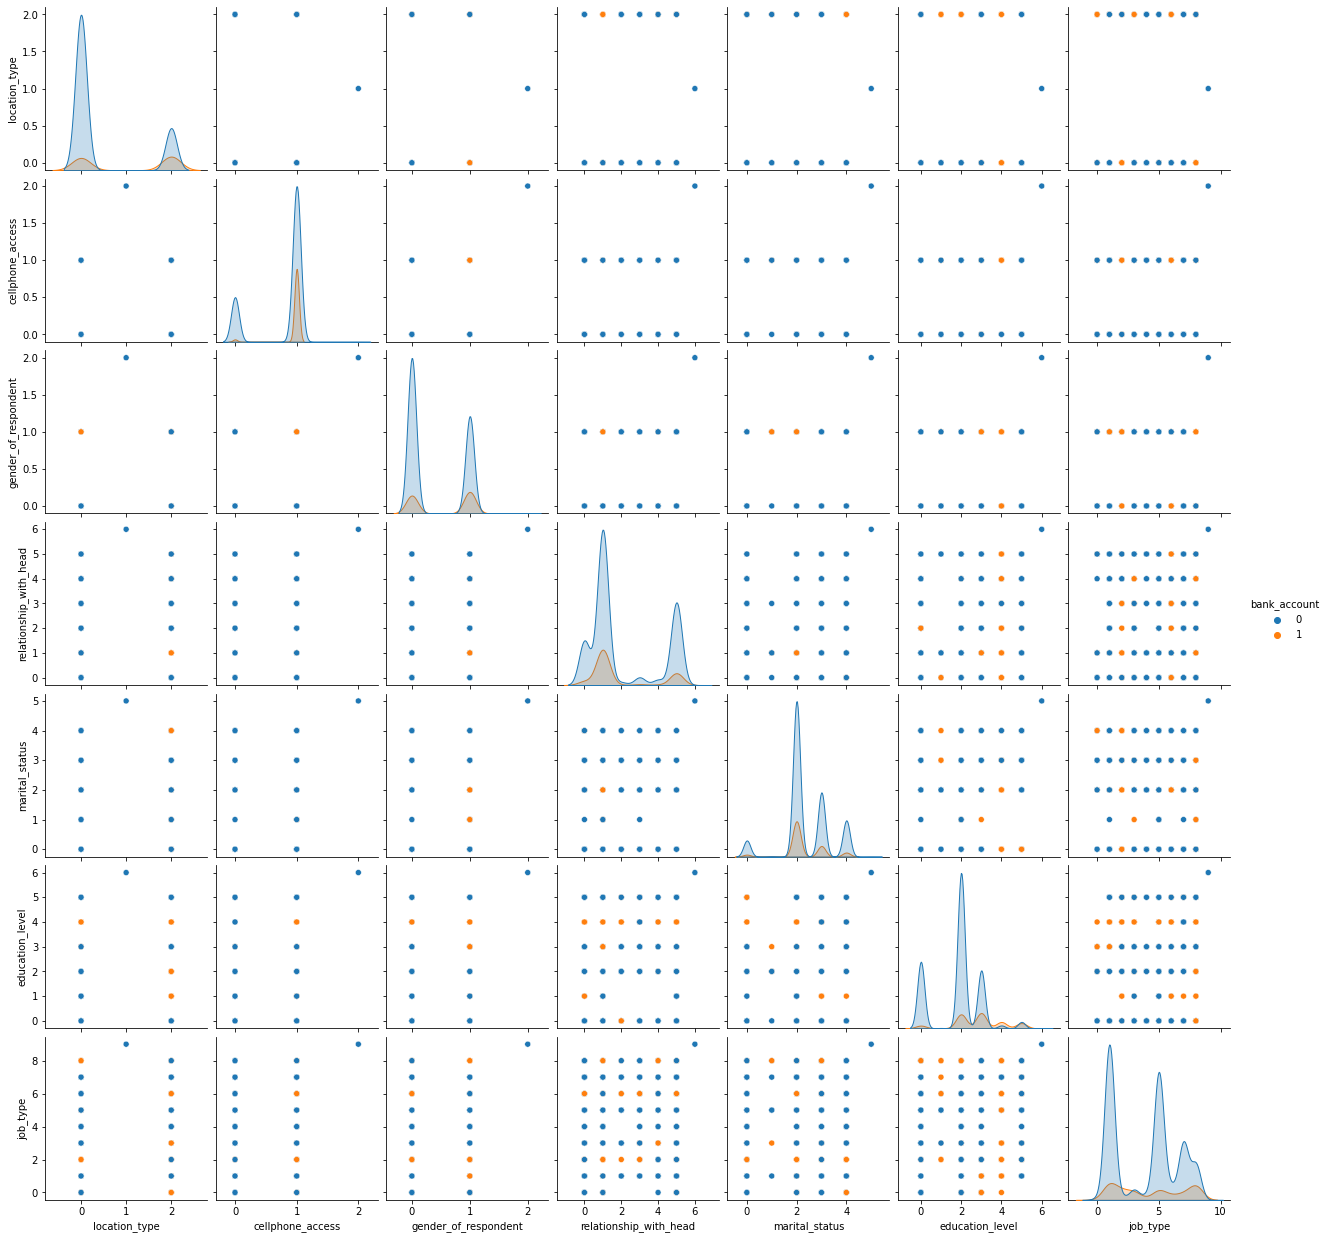

In [ ]:
sns.pairplot(df2,hue="bank_account")

In [ ]:
df3=(df1.join(df2))
df3.head()

,country,year,uniqueid,household_size,age_of_respondent,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,3.0,24.0,1,0,1,0,5,2,3,8
1,Kenya,2018,uniqueid_2,5.0,70.0,0,0,0,0,1,4,0,4
2,Kenya,2018,uniqueid_3,5.0,26.0,1,2,1,1,3,3,5,8
3,Kenya,2018,uniqueid_4,5.0,34.0,0,0,1,0,1,2,2,3
4,Kenya,2018,uniqueid_5,8.0,26.0,0,2,0,1,0,3,2,5


In [ ]:
t3=(t1.join(t2))
t3.head()

,country,year,uniqueid,household_size,age_of_respondent,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,3,30,1,1,1,1,2,3,2
1,Kenya,2018,uniqueid_6060,7,51,1,1,1,1,2,5,3
2,Kenya,2018,uniqueid_6065,3,77,0,0,0,4,2,0,8
3,Kenya,2018,uniqueid_6072,6,39,0,0,0,1,2,2,8
4,Kenya,2018,uniqueid_6073,3,16,1,0,1,0,3,3,8


In [ ]:
(df3.iloc[:,3:]).head()

,household_size,age_of_respondent,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,3.0,24.0,1,0,1,0,5,2,3,8
1,5.0,70.0,0,0,0,0,1,4,0,4
2,5.0,26.0,1,2,1,1,3,3,5,8
3,5.0,34.0,0,0,1,0,1,2,2,3
4,8.0,26.0,0,2,0,1,0,3,2,5


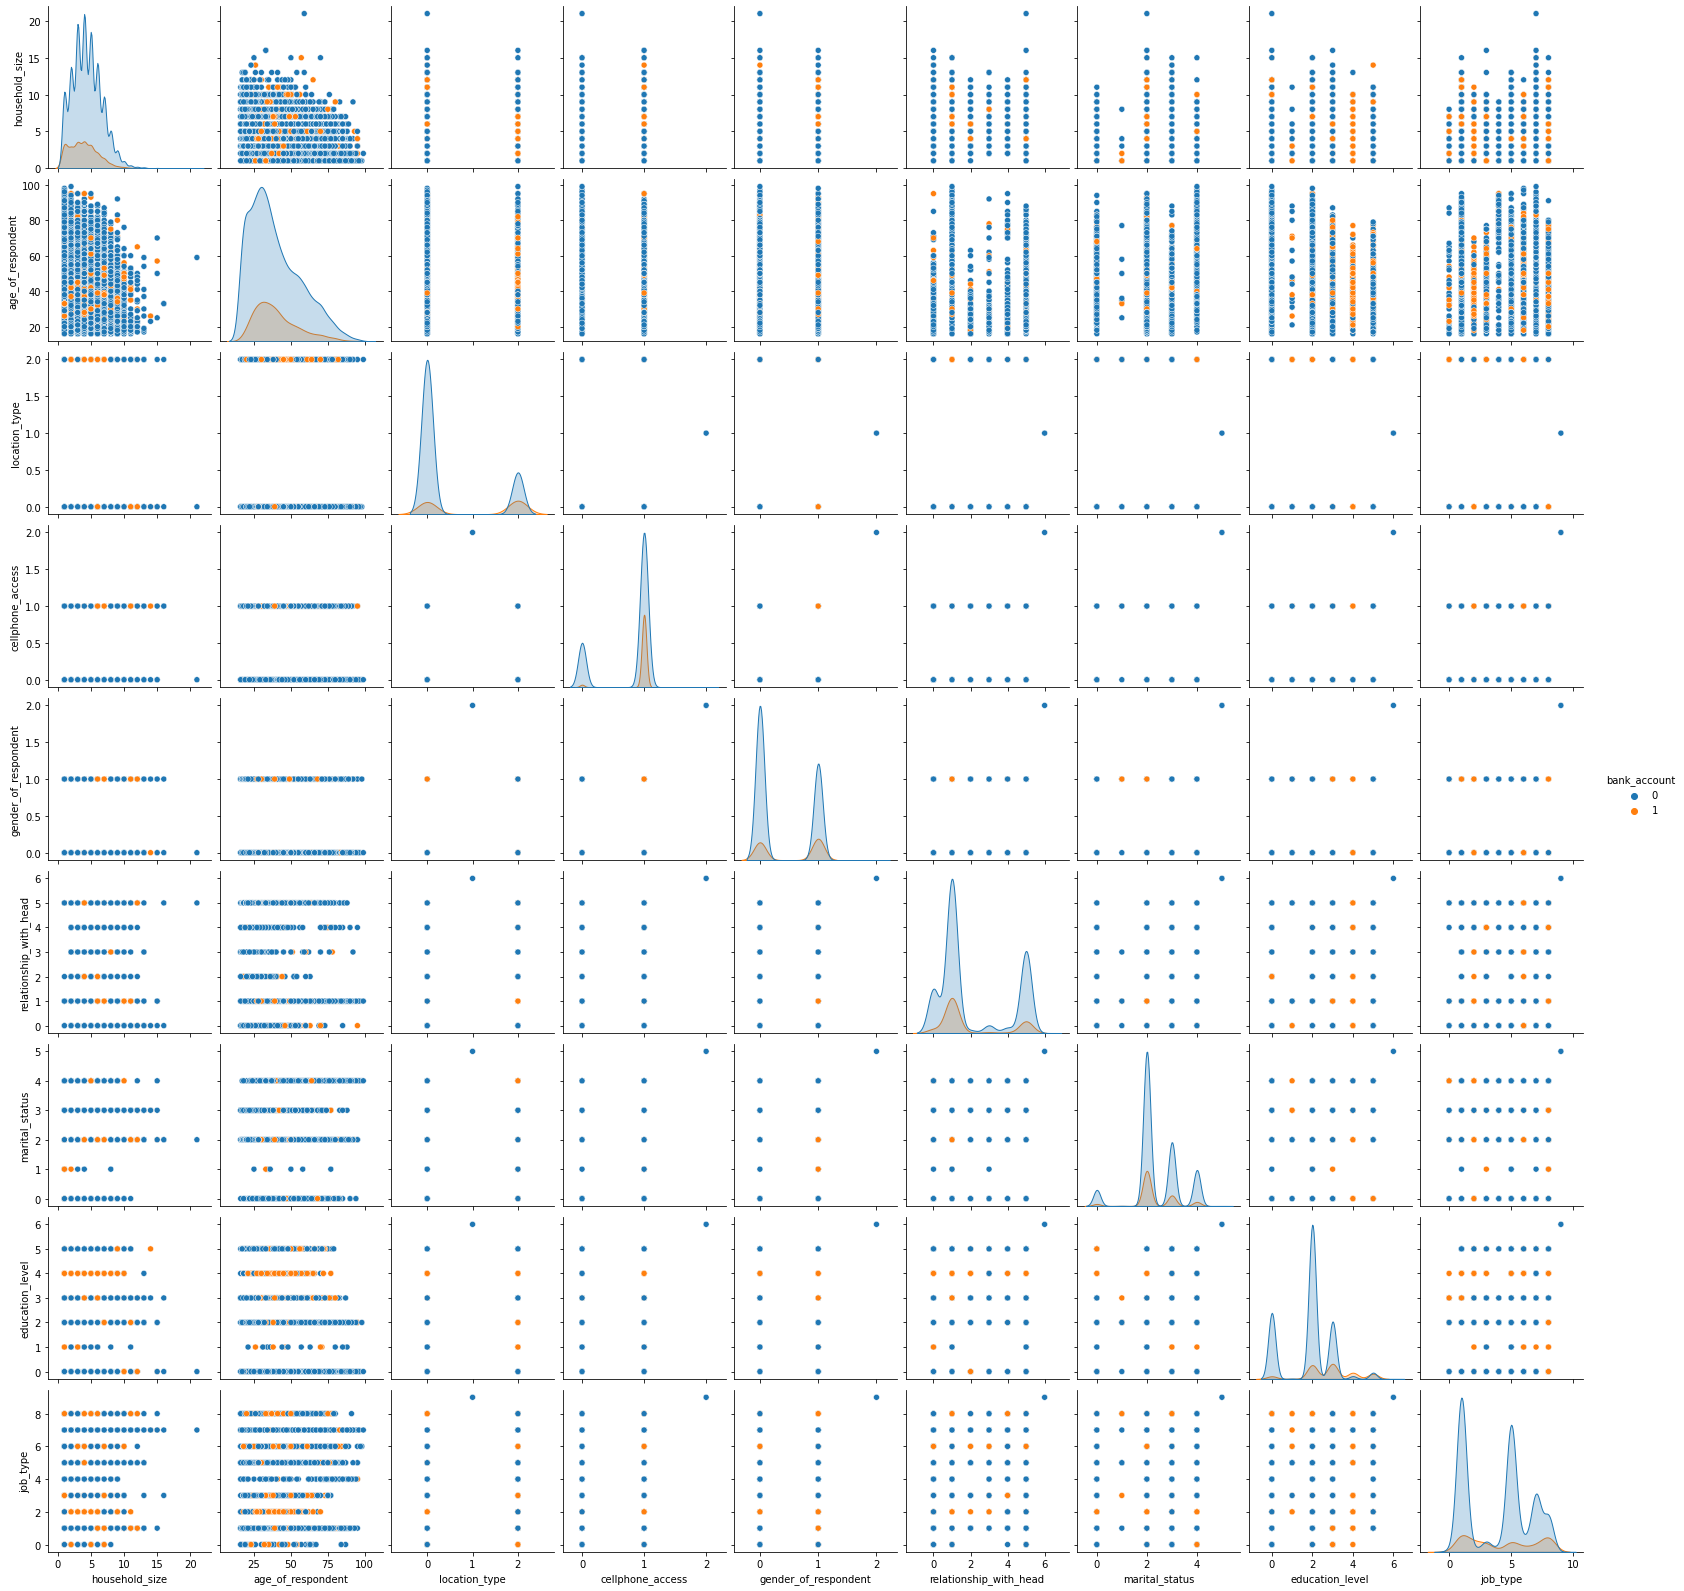

In [ ]:
sns.pairplot(df3.iloc[:,3:],hue="bank_account")

In [ ]:
df3.iloc[:,3:].describe(include="all")

,household_size,age_of_respondent,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,13313.000000,13313.000000,13314.000000,13314.000000,13314.000000,13314.000000,13314.000000,13314.000000,13314.000000,13314.000000
mean,4.270938,39.402238,0.177708,0.536954,0.811251,0.413550,2.044690,2.364954,2.011116,3.992038
std,2.167244,16.700795,0.382281,0.886325,0.391515,0.492641,1.894268,0.902840,1.232109,2.606482
min,1.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,27.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2.000000,1.000000
50%,4.000000,35.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2.000000,5.000000
75%,6.000000,50.000000,0.000000,2.000000,1.000000,1.000000,5.000000,3.000000,3.000000,6.000000
max,21.000000,99.000000,1.000000,2.000000,2.000000,2.000000,6.000000,5.000000,6.000000,9.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
df3=df3.dropna()
df4=(df3.iloc[:,3:]).drop(columns=["bank_account"])
x_train,x_test,y_train,y_test=train_test_split(df4,df3.bank_account,train_size=0.8)

t4=t3.iloc[:,3:]

In [ ]:
t4.head()

,household_size,age_of_respondent,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,3,30,1,1,1,1,2,3,2
1,7,51,1,1,1,1,2,5,3
2,3,77,0,0,0,4,2,0,8
3,6,39,0,0,0,1,2,2,8
4,3,16,1,0,1,0,3,3,8


In [ ]:
df4.shape,t4.shape

((13313, 9), (10086, 9))

In [ ]:
lr=LogisticRegression(max_iter=200)

In [ ]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
prediction=lr.predict(x_test)

In [ ]:
acc=accuracy_score(y_test,prediction)

In [ ]:
print("accuracy:{:.2%}".format(acc))

accuracy:83.93%


Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
bg=BaggingClassifier(base_estimator=KNeighborsClassifier(),n_estimators=100)

In [ ]:
bg.fit(x_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=100, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [ ]:
pip install mglearn

     |████████████████████████████████| 542kB 5.4MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=b15db63160c902a337a71cb6b0c8e74a935b588f51b4c387b10483949cc14364
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [ ]:
from mglearn.plot_interactive_tree import plot_tree_partition
from mglearn.plot_2d_separator import plot_2d_separator
from mglearn.tools import discrete_scatter
import matplotlib.pyplot as plt

TypeError: ignored

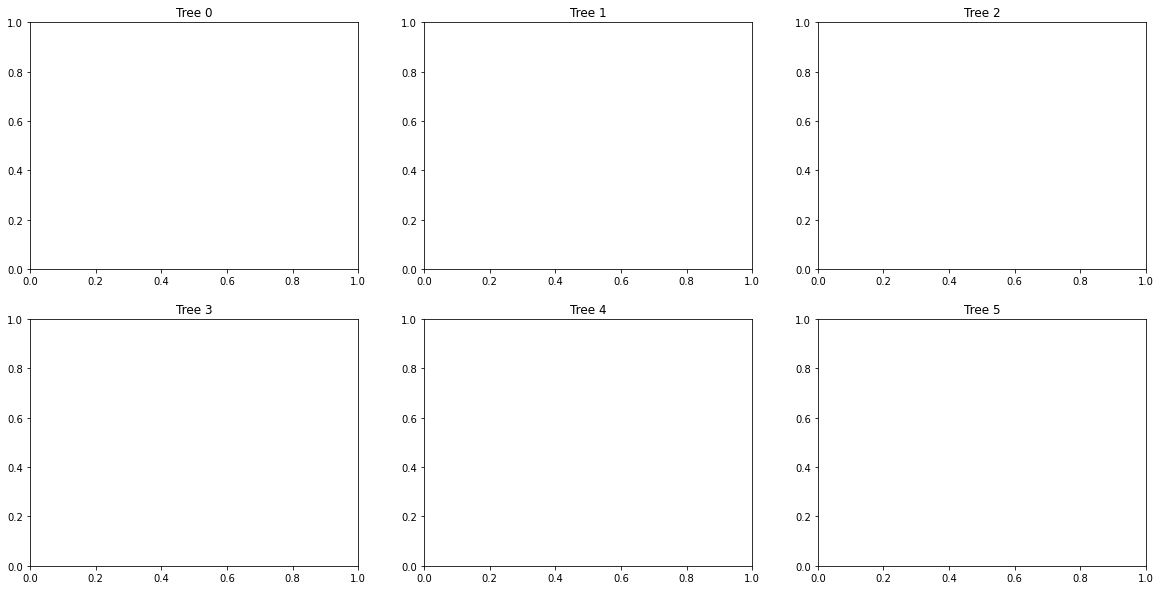

In [ ]:
fig,axes=plt.subplots(2,3,figsize=(20,10))

for i,(ax,tree) in enumerate(zip(axes.ravel(),bg.estimators_)):
  ax.set_title("Tree {}".format(i))
#  plot_tree_partition(x_train,y_train,tree,ax=ax)
plot_2d_separator(bg,x_train,fill=True, ax=axes[-1,-1],alpha=.4)
#axes[-1,-1].set_title("Bagging")
discrete_scatter(x_train,x_train,y_train)
plt.show()

In [ ]:
prediction=bg.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("acc:{:.2%}".format(accuracy_score(y_test,prediction)))

La particularité de Bagging est qu'il est capable de combiner plus plusieurs estimaeurs afin d'être la meilleur possible

In [ ]:
error=[]
for i in range(1,200):
  bagging=BaggingClassifier(base_estimator=KNeighborsClassifier(),n_estimators=i)
  bagging.fit(x_train,y_train)
  y_pred=bagging.predict(x_test)
  error.append(1-accuracy_score(y_pred,y_test))


In [ ]:
x=range(1,200)
plt.plot(x,error)
plt.show()

In [ ]:
a=(error==min(error))
a

In [ ]:
b=error.index(min(error))
b

In [ ]:
bagging=BaggingClassifier(base_estimator=KNeighborsClassifier(),n_estimators=b)
bagging.fit(x_train,y_train)
y_pred=bagging.predict(x_test)
print("acc:{:.2%}".format(accuracy_score(y_test,y_pred)))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
neighbor=KNeighborsClassifier(n_neighbors=2)
neighbor.fit(x_test,y_test)
y_pred=neighbor.predict(x_test)
print("acc:{:.2%}".format(accuracy_score(y_test,y_pred)))

In [ ]:
errorN=[]
for i in range(1,100):
  neighbor=KNeighborsClassifier(n_neighbors=i)
  neighbor.fit(x_test,y_test)
  y_pred=neighbor.predict(x_test)
  errorN.append(1-accuracy_score(y_test,y_pred))

plt.plot(errorN)
plt.axis(xmin=0,xmax=5)
#errorN.index(min(errorN))

# Submission

In [ ]:
bank_account1=neighbor.predict(t4)    #Soucis avec la prediction
bank_account=bagging.predict(t4)

In [ ]:
bank_account[:5]

In [ ]:
Submission=pd.DataFrame({"uniqueid":t1.uniqueid,"bank_account":bank_account})

In [ ]:
import numpy as np

In [ ]:
t4.shape

In [ ]:
np.count_nonzero(Submission.bank_account==1)

In [ ]:
Submission.to_csv("SubmissionFile.csv")